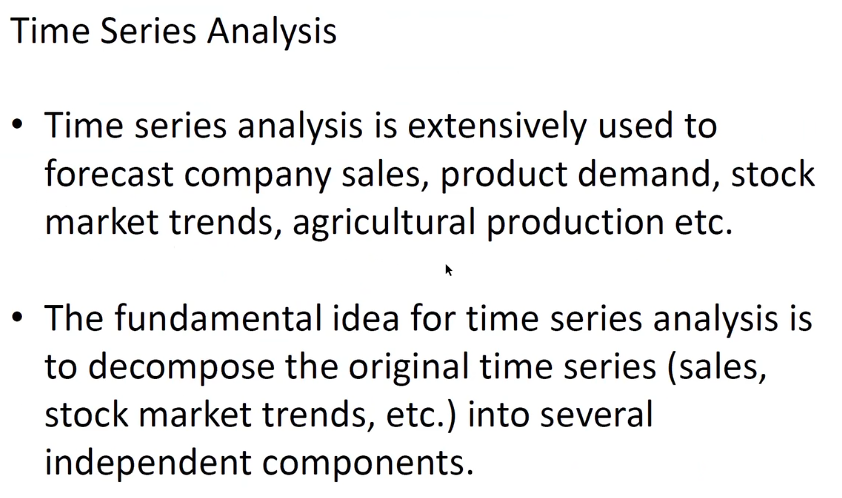

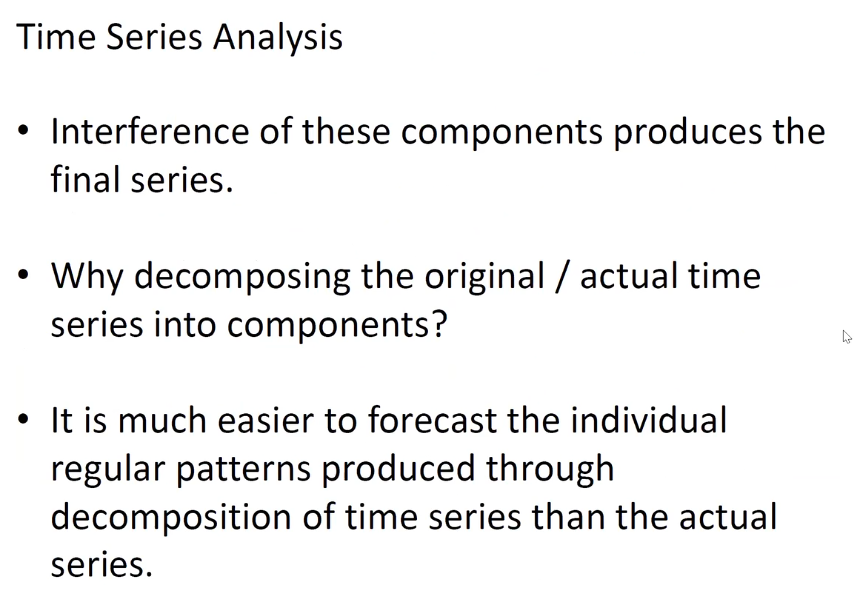

* multivariant time series

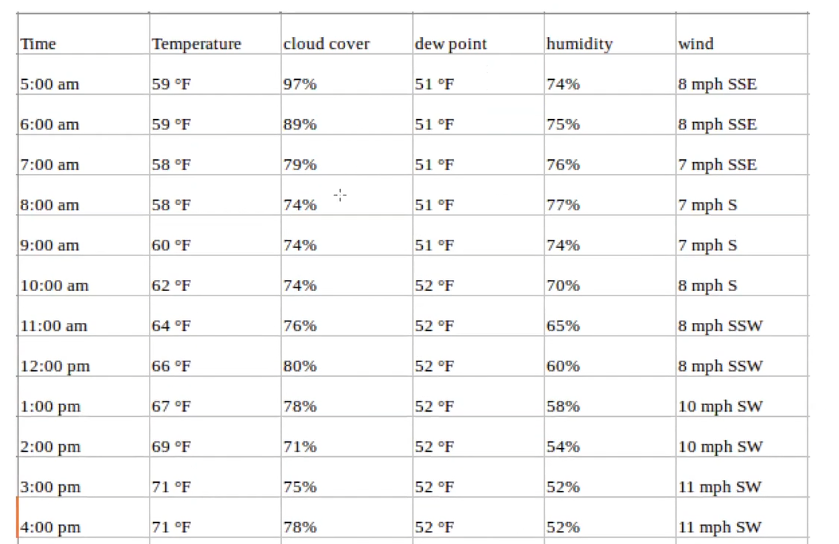

* inivariant time series

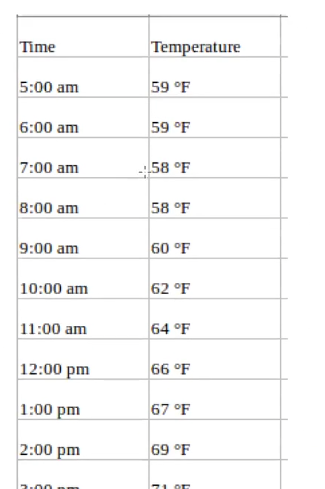


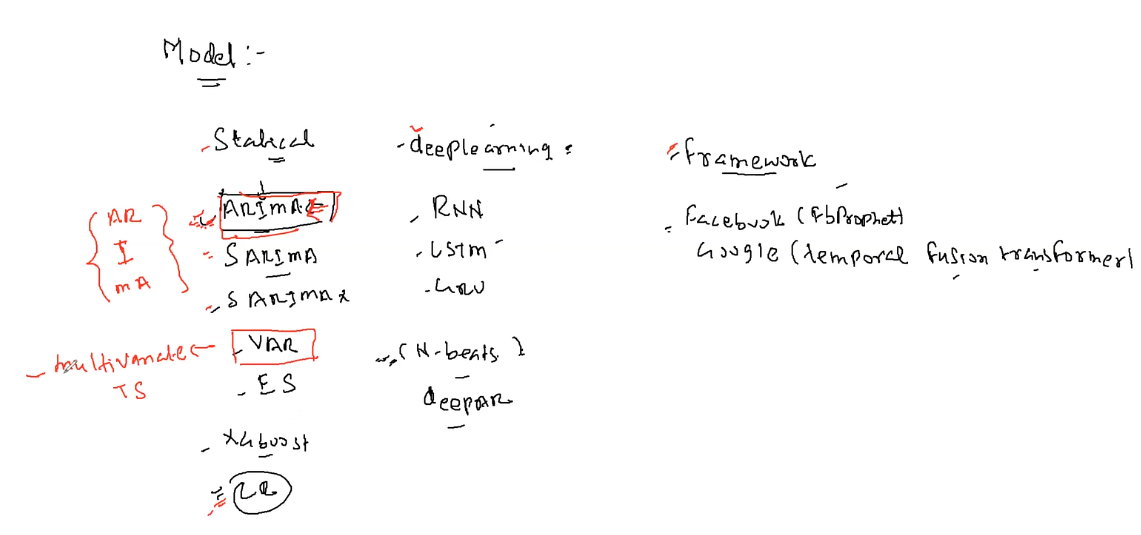

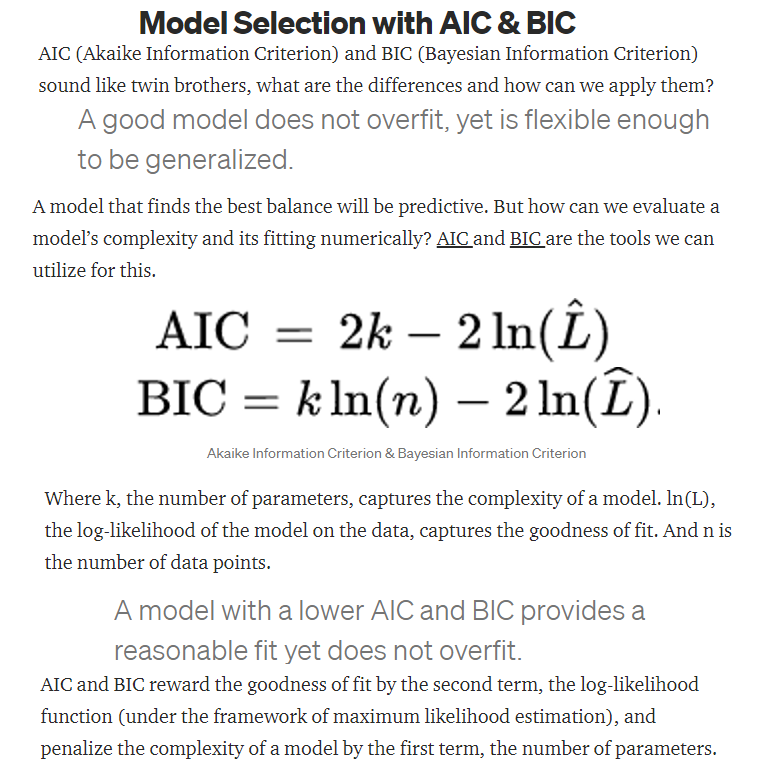

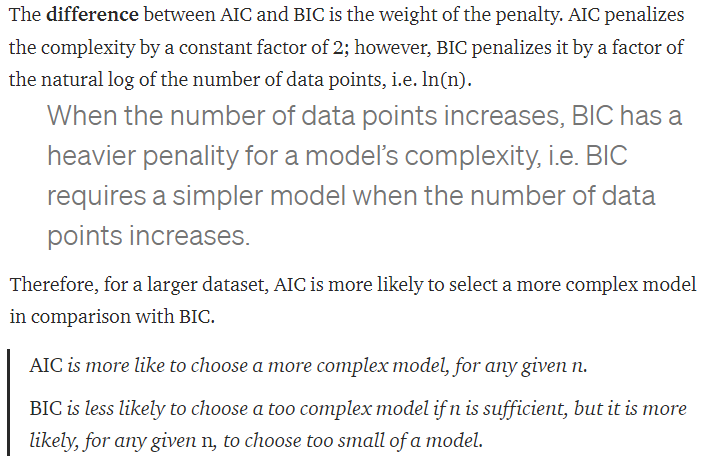

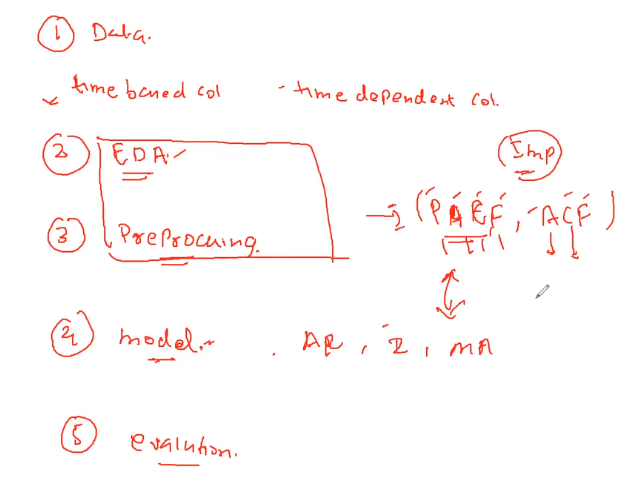

* in time series we use lagging time stamps to predict the value of the independent feature in another time stamp. in other words, based on the previous times (independent features) we are going to predict a next value (independent feature)

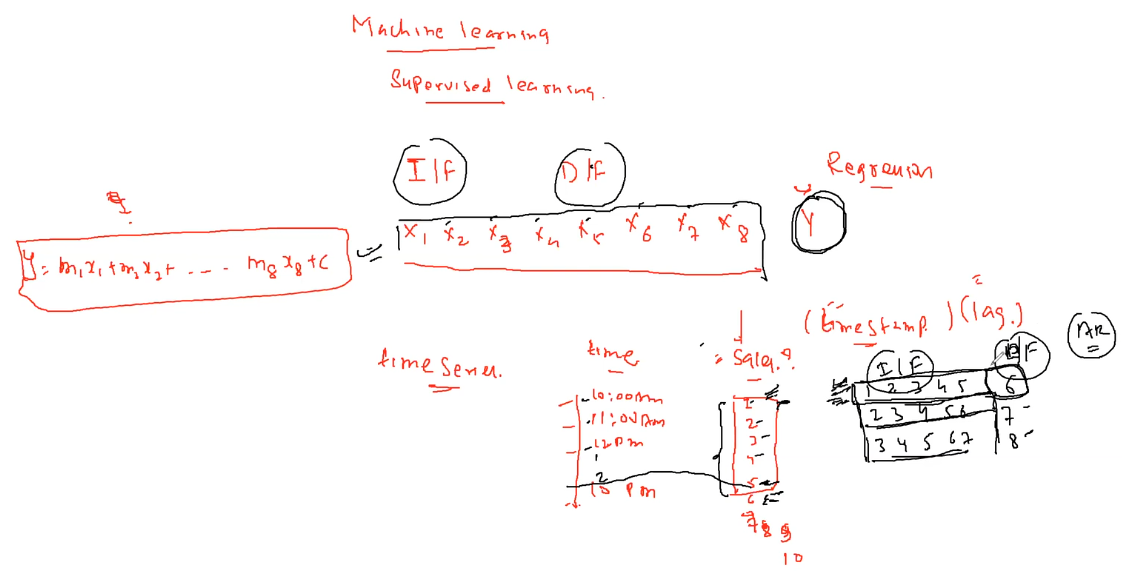

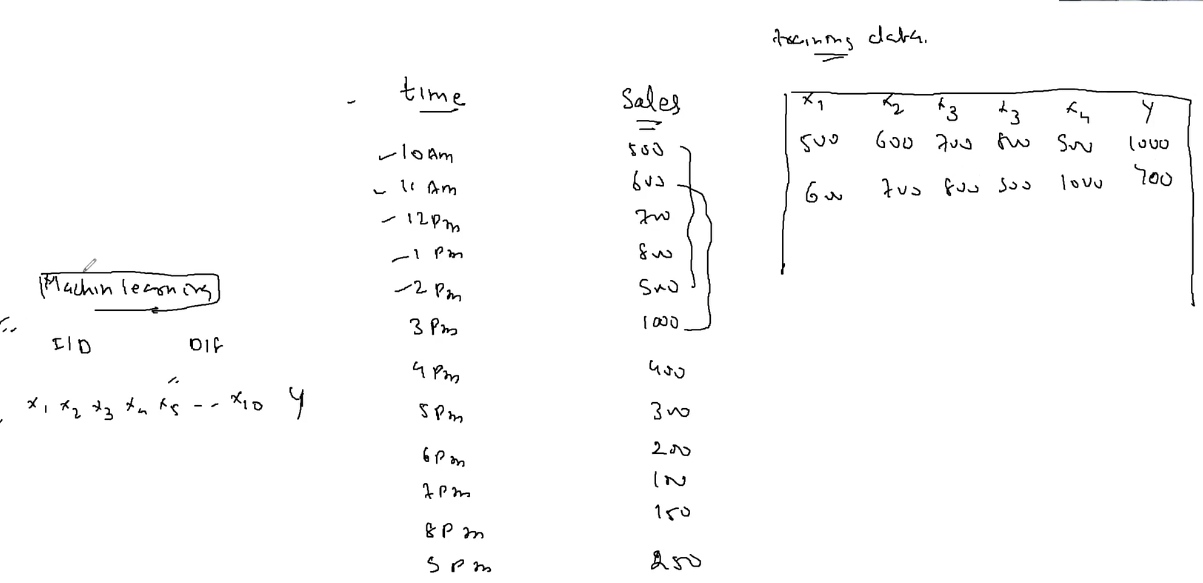

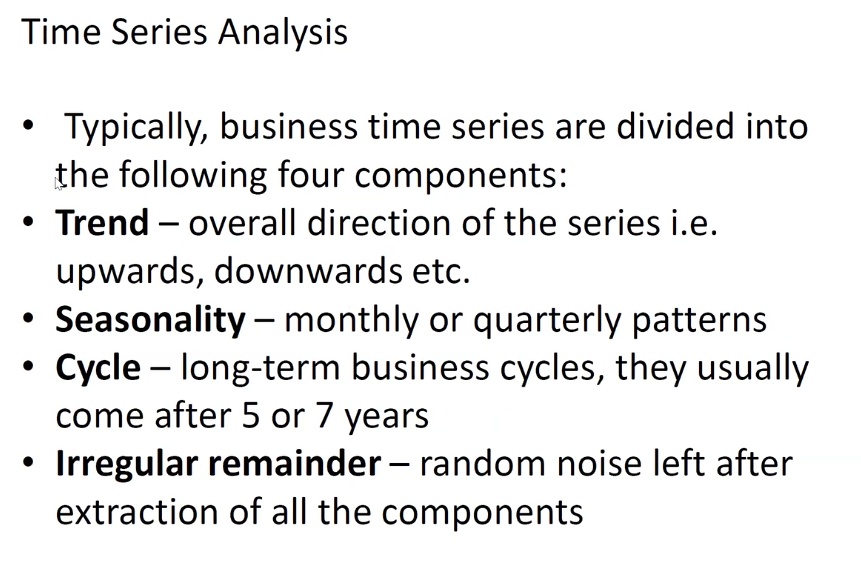

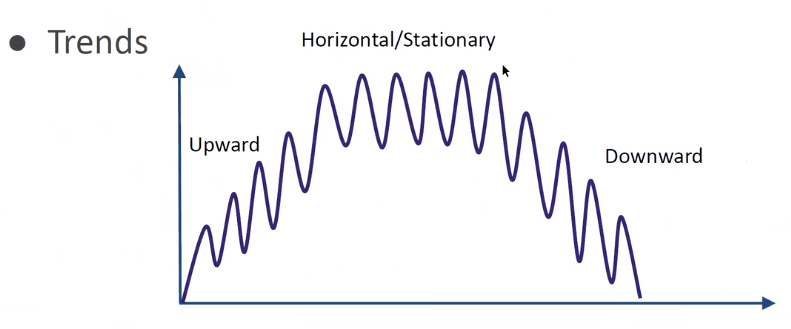

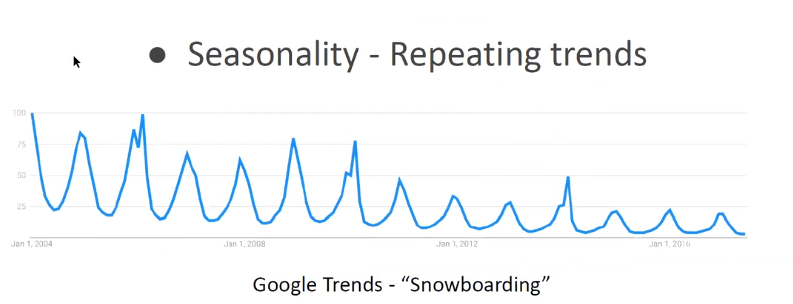

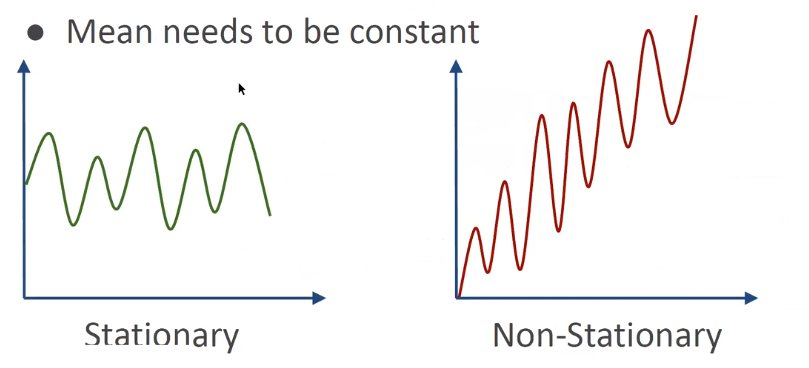

* converting non-stationary data to stationary through diferencing

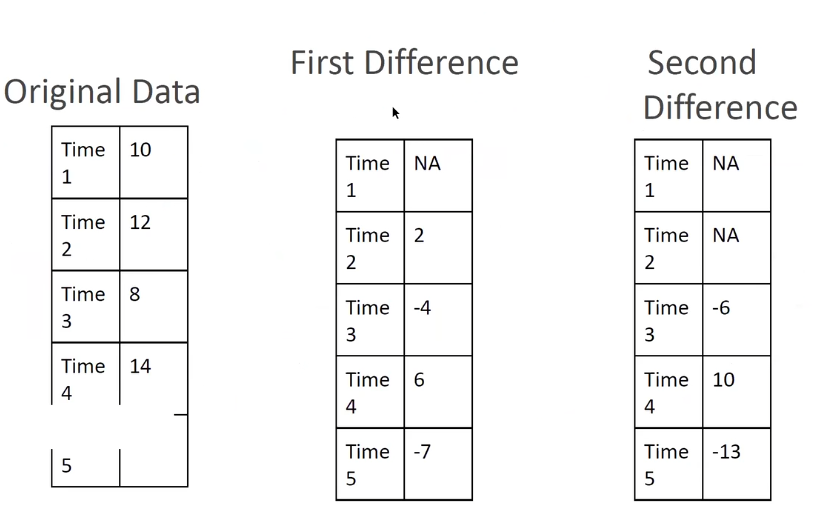

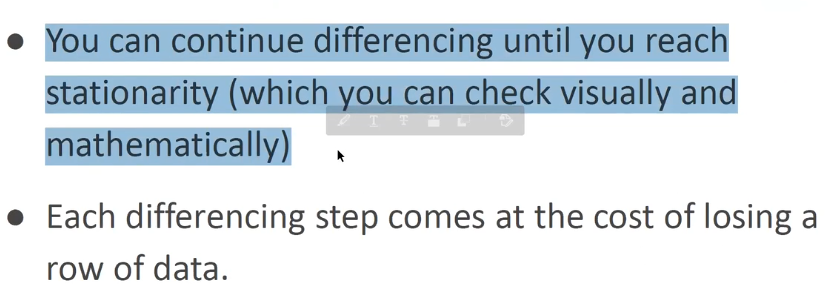

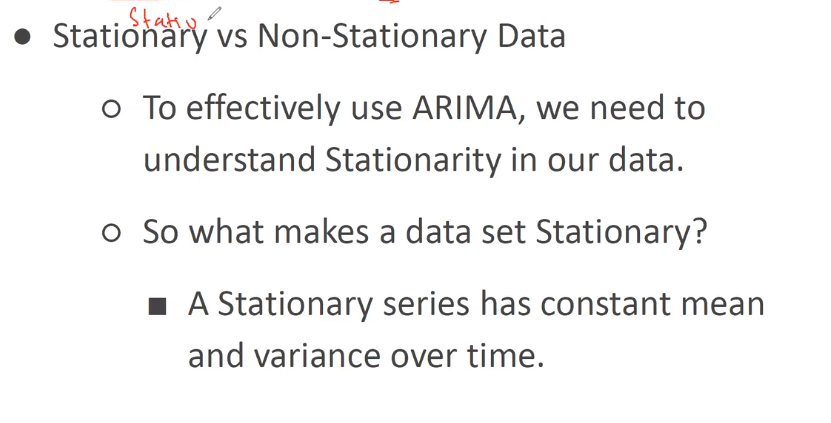

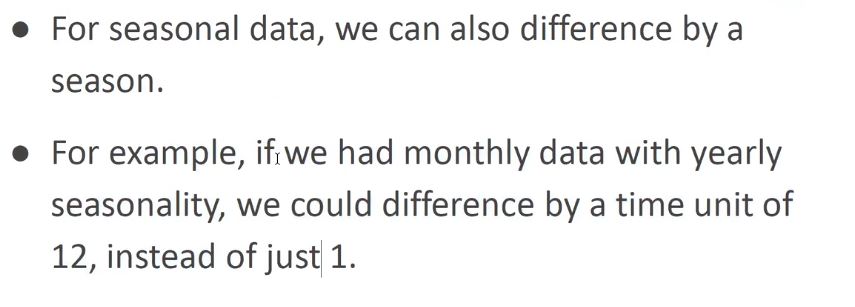


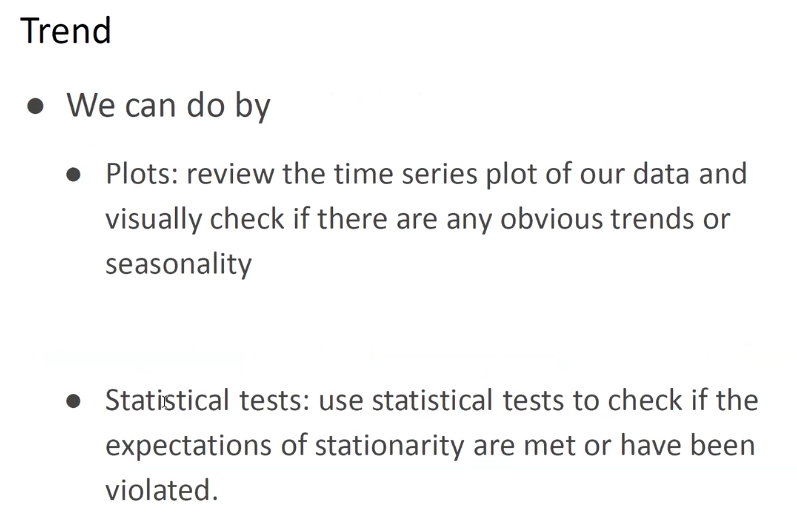

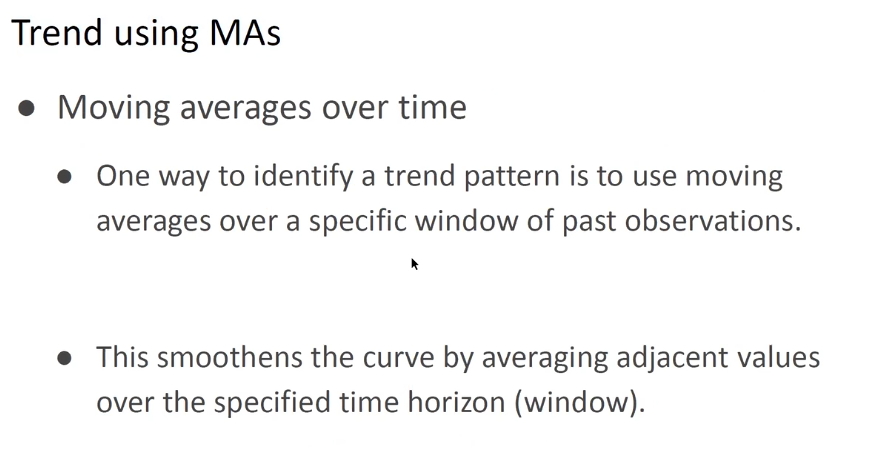

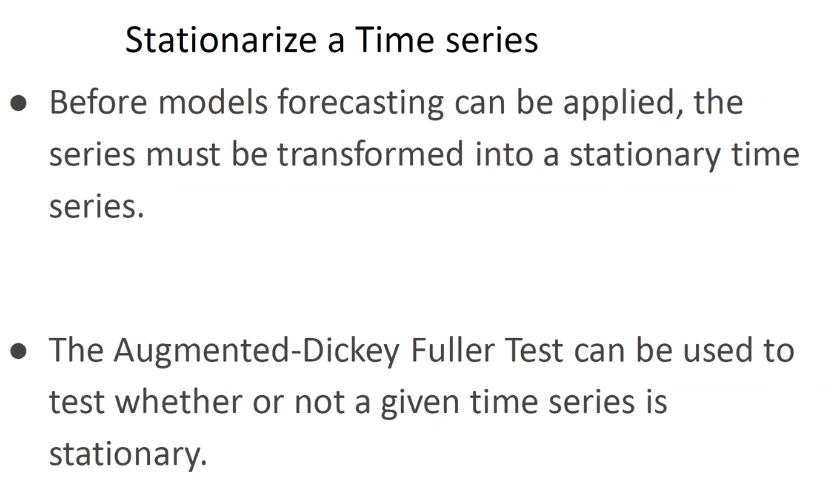

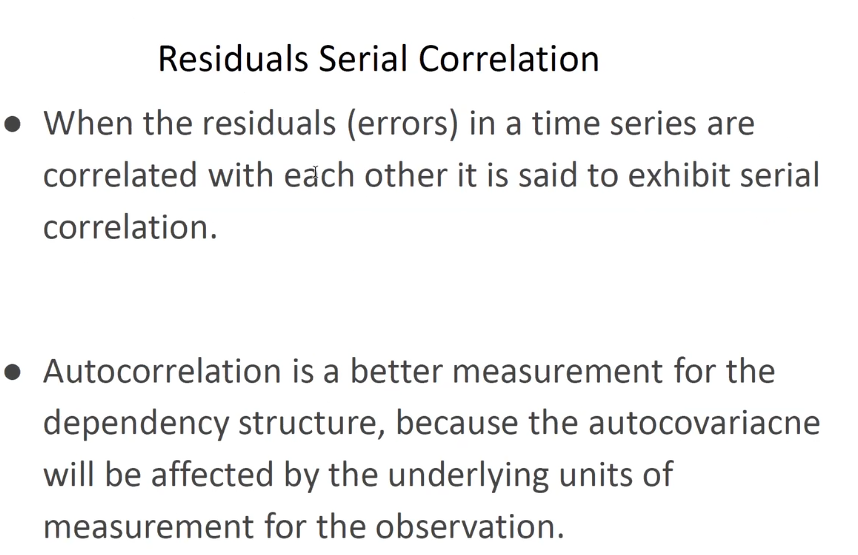

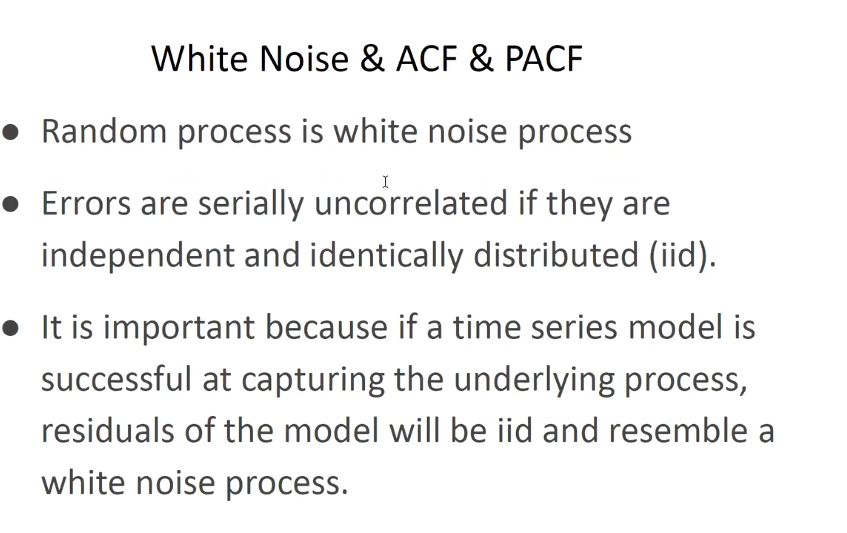

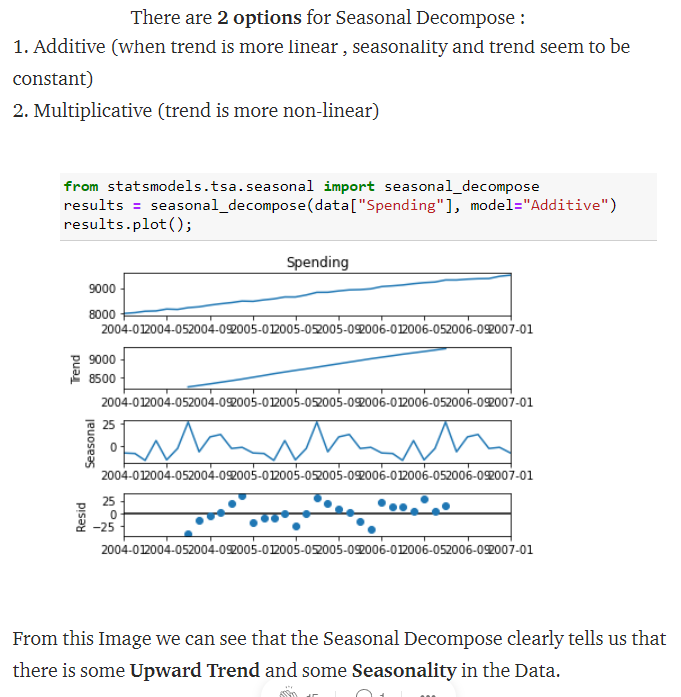

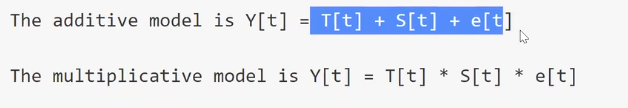

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_csv('http://ucanalytics.com/blogs/wp-content/uploads/2015/06/Tractor-Sales.csv')
dataset

Month-Year  Number of Tractor Sold
0       Jan-03                     141
1       Feb-03                     157
2       Mar-03                     185
3       Apr-03                     199
4       May-03                     203
..         ...                     ...
139     Aug-14                     848
140     Sep-14                     640
141     Oct-14                     581
142     Nov-14                     519
143     Dec-14                     605

[144 rows x 2 columns]

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month-Year              144 non-null    object
 1   Number of Tractor Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
# create dates with a specific format for the time range of the data
# MS gives the first day for each month; M will give the last day for each month

dates = pd.date_range(start="2003-01-01", freq="MS", periods=len(dataset))
dates
                      

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [5]:
dataset['month'] = dates.month
dataset['year'] = dates.year
dataset

Month-Year  Number of Tractor Sold  month  year
0       Jan-03                     141      1  2003
1       Feb-03                     157      2  2003
2       Mar-03                     185      3  2003
3       Apr-03                     199      4  2003
4       May-03                     203      5  2003
..         ...                     ...    ...   ...
139     Aug-14                     848      8  2014
140     Sep-14                     640      9  2014
141     Oct-14                     581     10  2014
142     Nov-14                     519     11  2014
143     Dec-14                     605     12  2014

[144 rows x 4 columns]

In [6]:
import calendar
calendar.month_abbr[1]

'Jan'

In [7]:
dataset["month"] = dataset["month"].apply(lambda x: calendar.month_abbr[x])
dataset

Month-Year  Number of Tractor Sold month  year
0       Jan-03                     141   Jan  2003
1       Feb-03                     157   Feb  2003
2       Mar-03                     185   Mar  2003
3       Apr-03                     199   Apr  2003
4       May-03                     203   May  2003
..         ...                     ...   ...   ...
139     Aug-14                     848   Aug  2014
140     Sep-14                     640   Sep  2014
141     Oct-14                     581   Oct  2014
142     Nov-14                     519   Nov  2014
143     Dec-14                     605   Dec  2014

[144 rows x 4 columns]

In [8]:
dataset.rename(columns={"Number of Tractor Sold":"Tractor-Sales"}, inplace=True)
dataset

Month-Year  Tractor-Sales month  year
0       Jan-03            141   Jan  2003
1       Feb-03            157   Feb  2003
2       Mar-03            185   Mar  2003
3       Apr-03            199   Apr  2003
4       May-03            203   May  2003
..         ...            ...   ...   ...
139     Aug-14            848   Aug  2014
140     Sep-14            640   Sep  2014
141     Oct-14            581   Oct  2014
142     Nov-14            519   Nov  2014
143     Dec-14            605   Dec  2014

[144 rows x 4 columns]

In [9]:
# converting the index of the dataframe as per the info in dates
dataset.set_index(dates, inplace=True)
dataset

Month-Year  Tractor-Sales month  year
2003-01-01     Jan-03            141   Jan  2003
2003-02-01     Feb-03            157   Feb  2003
2003-03-01     Mar-03            185   Mar  2003
2003-04-01     Apr-03            199   Apr  2003
2003-05-01     May-03            203   May  2003
...               ...            ...   ...   ...
2014-08-01     Aug-14            848   Aug  2014
2014-09-01     Sep-14            640   Sep  2014
2014-10-01     Oct-14            581   Oct  2014
2014-11-01     Nov-14            519   Nov  2014
2014-12-01     Dec-14            605   Dec  2014

[144 rows x 4 columns]

In [10]:
# dataset = [["Tractor-Sales","month","year"]]   - also can be used
 
dataset.drop("Month-Year", axis=1, inplace=True)
dataset

Tractor-Sales month  year
2003-01-01            141   Jan  2003
2003-02-01            157   Feb  2003
2003-03-01            185   Mar  2003
2003-04-01            199   Apr  2003
2003-05-01            203   May  2003
...                   ...   ...   ...
2014-08-01            848   Aug  2014
2014-09-01            640   Sep  2014
2014-10-01            581   Oct  2014
2014-11-01            519   Nov  2014
2014-12-01            605   Dec  2014

[144 rows x 3 columns]

In [11]:
ts_sales = dataset["Tractor-Sales"]
ts_sales

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: Tractor-Sales, Length: 144, dtype: int64

<AxesSubplot:>

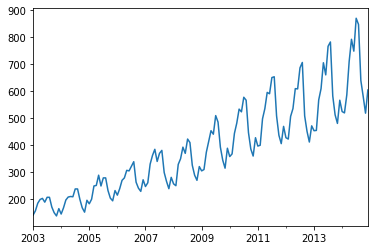

In [12]:
ts_sales.plot()

In [13]:
# decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
decompose = seasonal_decompose(ts_sales)

In [15]:
decompose.trend

2003-01-01   NaN
2003-02-01   NaN
2003-03-01   NaN
2003-04-01   NaN
2003-05-01   NaN
              ..
2014-08-01   NaN
2014-09-01   NaN
2014-10-01   NaN
2014-11-01   NaN
2014-12-01   NaN
Freq: MS, Name: trend, Length: 144, dtype: float64

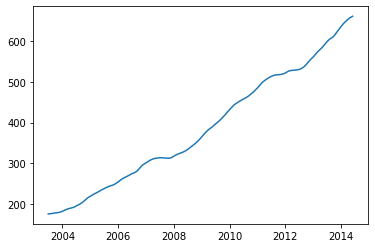

In [16]:
plt.plot(decompose.trend)

In [17]:
decompose.seasonal

2003-01-01   -68.763889
2003-02-01   -66.434343
2003-03-01    -1.638889
2003-04-01    29.952020
2003-05-01    75.876263
                ...    
2014-08-01    90.482323
2014-09-01   -14.233586
2014-10-01   -61.328283
2014-11-01   -88.680556
2014-12-01   -38.763889
Freq: MS, Name: seasonal, Length: 144, dtype: float64

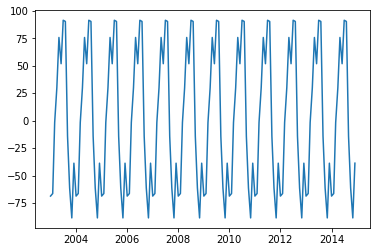

In [18]:
plt.plot(decompose.seasonal)

In [19]:
decompose.resid

2003-01-01   NaN
2003-02-01   NaN
2003-03-01   NaN
2003-04-01   NaN
2003-05-01   NaN
              ..
2014-08-01   NaN
2014-09-01   NaN
2014-10-01   NaN
2014-11-01   NaN
2014-12-01   NaN
Freq: MS, Name: resid, Length: 144, dtype: float64

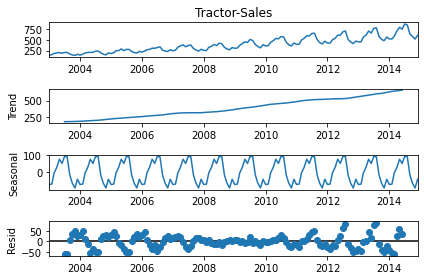

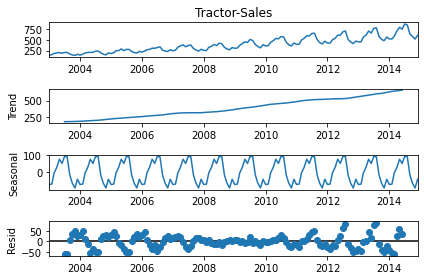

In [20]:
decompose.plot()

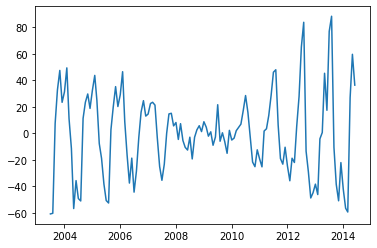

In [21]:
plt.plot(decompose.resid)

# simple moving average

In [23]:
# rolling stats

ts_sales.rolling(window=4).mean()

2003-01-01       NaN
2003-02-01       NaN
2003-03-01       NaN
2003-04-01    170.50
2003-05-01    186.00
               ...  
2014-08-01    815.25
2014-09-01    777.00
2014-10-01    735.00
2014-11-01    647.00
2014-12-01    586.25
Freq: MS, Name: Tractor-Sales, Length: 144, dtype: float64

In [24]:
ts_sales.rolling(window=1).mean()

2003-01-01    141.0
2003-02-01    157.0
2003-03-01    185.0
2003-04-01    199.0
2003-05-01    203.0
              ...  
2014-08-01    848.0
2014-09-01    640.0
2014-10-01    581.0
2014-11-01    519.0
2014-12-01    605.0
Freq: MS, Name: Tractor-Sales, Length: 144, dtype: float64

In [25]:
ts_sales.rolling(window=2).mean()

2003-01-01      NaN
2003-02-01    149.0
2003-03-01    171.0
2003-04-01    192.0
2003-05-01    201.0
              ...  
2014-08-01    859.5
2014-09-01    744.0
2014-10-01    610.5
2014-11-01    550.0
2014-12-01    562.0
Freq: MS, Name: Tractor-Sales, Length: 144, dtype: float64

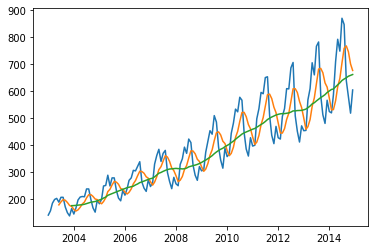

In [26]:
plt.plot(ts_sales)
plt.plot(ts_sales.rolling(window=6).mean())
plt.plot(ts_sales.rolling(window=12).mean())

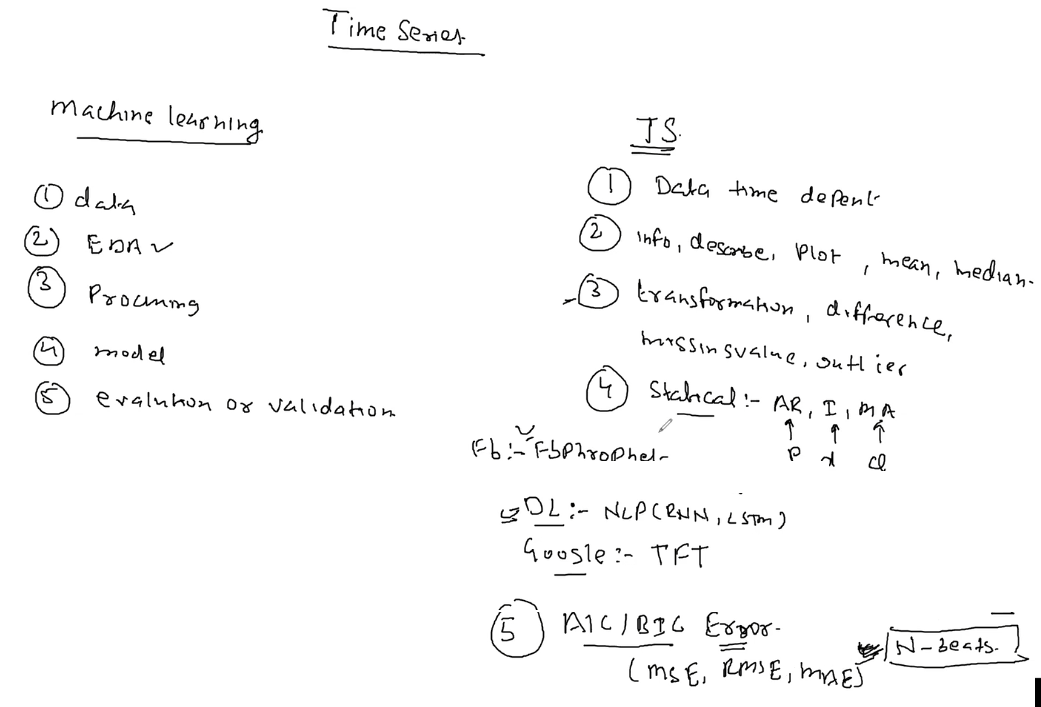

### multiplicative and additive series

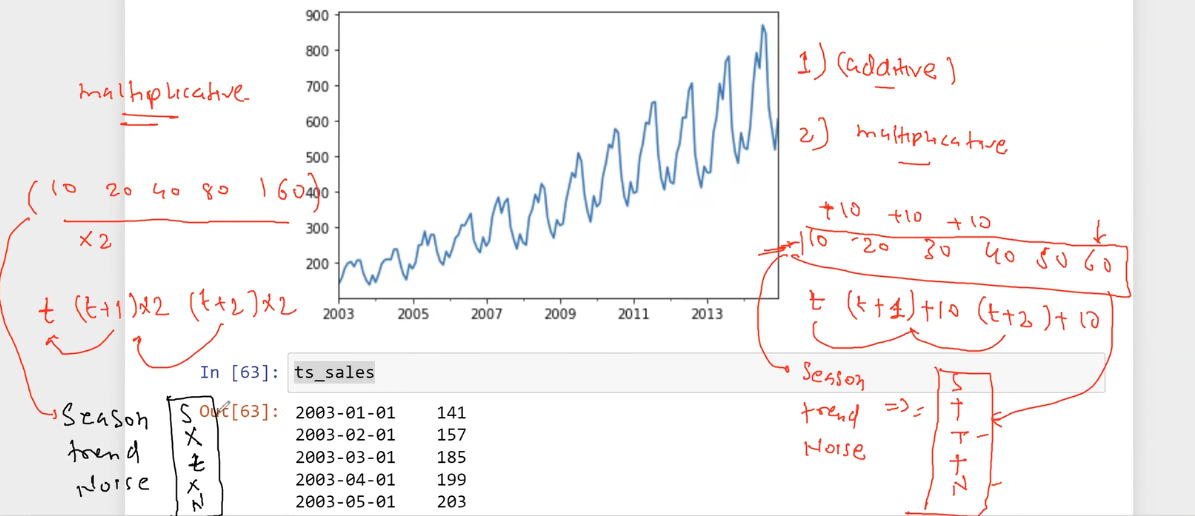

In [27]:
dataset

Tractor-Sales month  year
2003-01-01            141   Jan  2003
2003-02-01            157   Feb  2003
2003-03-01            185   Mar  2003
2003-04-01            199   Apr  2003
2003-05-01            203   May  2003
...                   ...   ...   ...
2014-08-01            848   Aug  2014
2014-09-01            640   Sep  2014
2014-10-01            581   Oct  2014
2014-11-01            519   Nov  2014
2014-12-01            605   Dec  2014

[144 rows x 3 columns]

In [28]:
# pivot tables

pd.pivot(dataset, values="Tractor-Sales", index="month", columns="year")

year   2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  2014
month                                                                        
Apr     199   208   251   279   362   350   414   482   536   536   610   710
Aug     207   238   279   339   381   410   486   567   654   707   783   848
Dec     165   196   232   272   281   321   389   428   470   472   567   605
Feb     157   168   200   239   261   250   310   368   400   423   455   520
Jan     141   145   183   215   247   257   305   358   397   428   454   525
Jul     207   238   279   322   370   423   510   578   651   687   767   871
Jun     189   209   249   305   340   370   441   524   591   609   661   749
Mar     185   197   249   270   330   329   374   444   498   507   568   587
May     203   210   289   307   385   393   454   534   596   610   706   793
Nov     138   152   194   229   239   270   315   360   406   412   481   519
Oct     150   168   204   241   266   289   345   386   437   452   513   581
Sep     171   199   232   263   299   326   393   447   509   509   583   640

In [29]:
pd.pivot(dataset, values="Tractor-Sales", index="year", columns="month")

month  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
year                                                             
2003   199  207  165  157  141  207  189  185  203  138  150  171
2004   208  238  196  168  145  238  209  197  210  152  168  199
2005   251  279  232  200  183  279  249  249  289  194  204  232
2006   279  339  272  239  215  322  305  270  307  229  241  263
2007   362  381  281  261  247  370  340  330  385  239  266  299
2008   350  410  321  250  257  423  370  329  393  270  289  326
2009   414  486  389  310  305  510  441  374  454  315  345  393
2010   482  567  428  368  358  578  524  444  534  360  386  447
2011   536  654  470  400  397  651  591  498  596  406  437  509
2012   536  707  472  423  428  687  609  507  610  412  452  509
2013   610  783  567  455  454  767  661  568  706  481  513  583
2014   710  848  605  520  525  871  749  587  793  519  581  640

In [30]:
dataset_pvt = pd.pivot(dataset, values="Tractor-Sales", index="month", columns="year")
dataset_pvt

year   2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  2014
month                                                                        
Apr     199   208   251   279   362   350   414   482   536   536   610   710
Aug     207   238   279   339   381   410   486   567   654   707   783   848
Dec     165   196   232   272   281   321   389   428   470   472   567   605
Feb     157   168   200   239   261   250   310   368   400   423   455   520
Jan     141   145   183   215   247   257   305   358   397   428   454   525
Jul     207   238   279   322   370   423   510   578   651   687   767   871
Jun     189   209   249   305   340   370   441   524   591   609   661   749
Mar     185   197   249   270   330   329   374   444   498   507   568   587
May     203   210   289   307   385   393   454   534   596   610   706   793
Nov     138   152   194   229   239   270   315   360   406   412   481   519
Oct     150   168   204   241   266   289   345   386   437   452   513   581
Sep     171   199   232   263   299   326   393   447   509   509   583   640

In [41]:
# resorting the order of the index
dataset_pvt.reindex(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])


year   2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  2014
month                                                                        
Jan     141   145   183   215   247   257   305   358   397   428   454   525
Feb     157   168   200   239   261   250   310   368   400   423   455   520
Mar     185   197   249   270   330   329   374   444   498   507   568   587
Apr     199   208   251   279   362   350   414   482   536   536   610   710
May     203   210   289   307   385   393   454   534   596   610   706   793
Jun     189   209   249   305   340   370   441   524   591   609   661   749
Jul     207   238   279   322   370   423   510   578   651   687   767   871
Aug     207   238   279   339   381   410   486   567   654   707   783   848
Sep     171   199   232   263   299   326   393   447   509   509   583   640
Oct     150   168   204   241   266   289   345   386   437   452   513   581
Nov     138   152   194   229   239   270   315   360   406   412   481   519
Dec     165   196   232   272   281   321   389   428   470   472   567   605

<AxesSubplot:xlabel='month'>

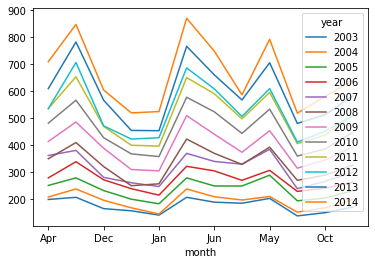

In [42]:
dataset_pvt.plot()

<AxesSubplot:>

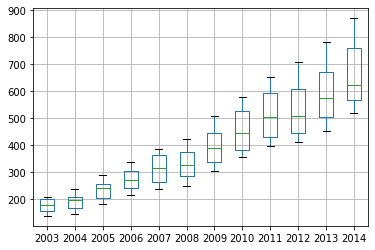

In [43]:
dataset_pvt.boxplot()

In [44]:
ts_sales = dataset["Tractor-Sales"]
ts_sales

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: Tractor-Sales, Length: 144, dtype: int64

C:\Users\rivil\AppData\Roaming\Python\Python36\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Tractor-Sales', ylabel='Density'>

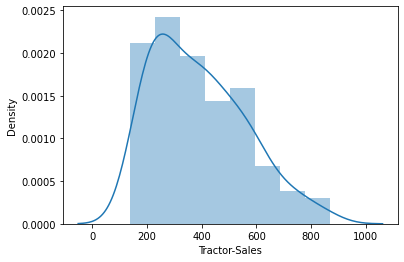

In [47]:
import seaborn as sns
sns.distplot(ts_sales)

In [51]:
# test stationarity

from statsmodels.tsa.stattools import adfuller

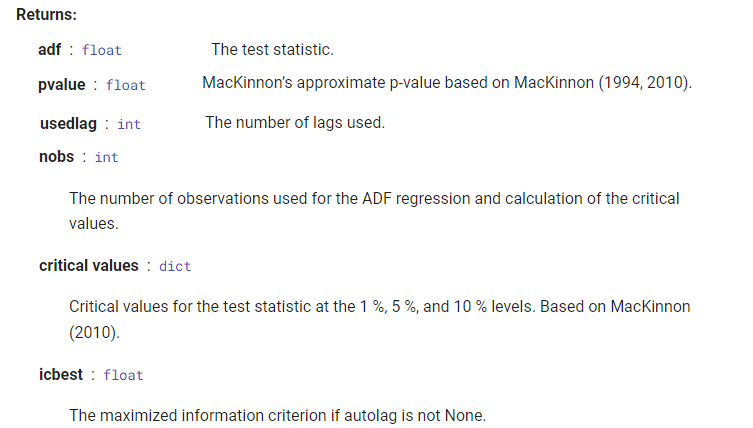

In [52]:
# Ho hypothesis - data is not stationary
# H1 data is stationary
# p<0.05 rejects the Ho and accepts H1 -data is stationary

adfuller(ts_sales)

(1.1088250591467355,
 0.9952912415248419,
 14,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 1082.5357724796872)

In [101]:
def test_stationary(timeseries):
    rollmean = timeseries.rolling(12).mean()
    rollstd = timeseries.rolling(12).std()
    plt.figure(figsize=[18,10])
    plt.grid("both")
    plt.plot(timeseries, label="time series")
    plt.plot(rollmean, label="roll mean")
    plt.plot(rollstd, label="roll std")
    plt.legend()
    
    print("-------------")
    print("results of Diskey-fuller test:")
    dftest = adfuller(timeseries, autolag = "AIC")   # the output is a dictionary
    dfoutput = pd.Series(dftest[0:4], index=["Test Statistics","pvalue","# lags used","# of observations"])
    for key,value in dftest[4].items():
        dfoutput[f"confidense Intevals ({key})"]= value
    print(dfoutput)

-------------
results of Diskey-fuller test:
Test Statistics                1.108825
pvalue                         0.995291
# lags used                   14.000000
# of observations            129.000000
confidense Intevals (1%)      -3.482088
confidense Intevals (5%)      -2.884219
confidense Intevals (10%)     -2.578864
dtype: float64


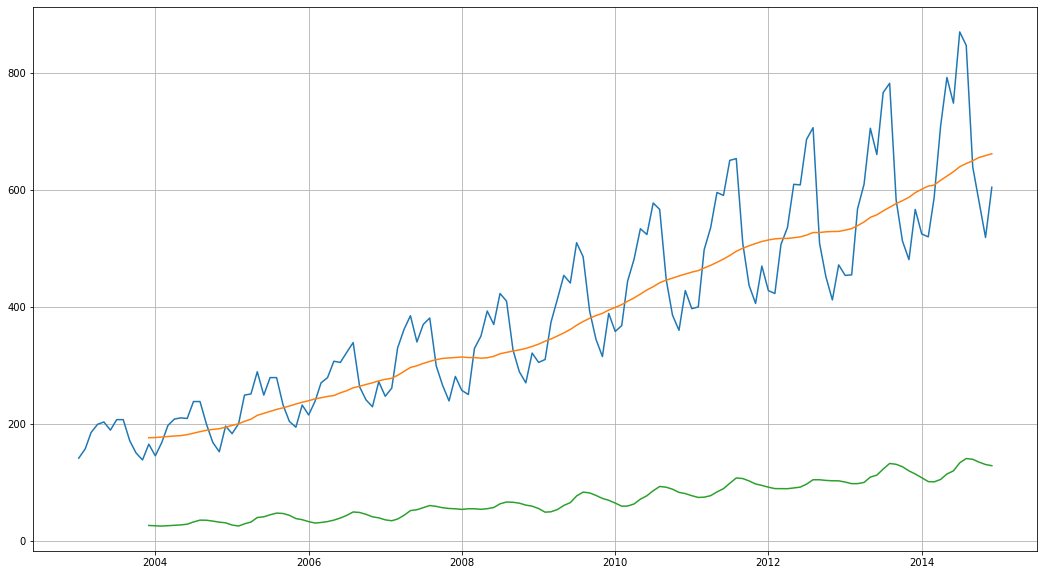

In [88]:
test_stationary(ts_sales)

In [89]:
ts_sales

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: Tractor-Sales, Length: 144, dtype: int64

In [90]:
# differencing
one_dif = ts_sales.diff(periods=1)
one_dif.dropna(inplace=True)  # drops the first NA value due to the diff with period 1
one_dif

2003-02-01     16.0
2003-03-01     28.0
2003-04-01     14.0
2003-05-01      4.0
2003-06-01    -14.0
              ...  
2014-08-01    -23.0
2014-09-01   -208.0
2014-10-01    -59.0
2014-11-01    -62.0
2014-12-01     86.0
Freq: MS, Name: Tractor-Sales, Length: 143, dtype: float64

-------------
results of Diskey-fuller test:
Test Statistics               -2.543481
pvalue                         0.105250
# lags used                   14.000000
# of observations            128.000000
confidense Intevals (1%)      -3.482501
confidense Intevals (5%)      -2.884398
confidense Intevals (10%)     -2.578960
dtype: float64


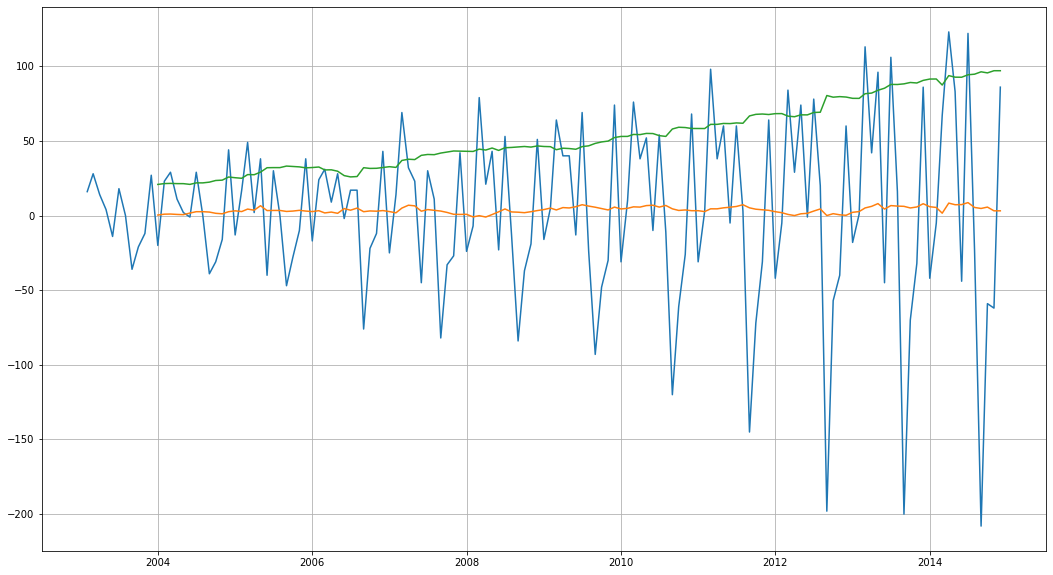

In [91]:
test_stationary(one_dif)

In [92]:
# differencing
two_dif = ts_sales.diff(periods=2)
two_dif.dropna(inplace=True)  # drops the first NA value due to the diff with period 2
two_dif

2003-03-01     44.0
2003-04-01     42.0
2003-05-01     18.0
2003-06-01    -10.0
2003-07-01      4.0
              ...  
2014-08-01     99.0
2014-09-01   -231.0
2014-10-01   -267.0
2014-11-01   -121.0
2014-12-01     24.0
Freq: MS, Name: Tractor-Sales, Length: 142, dtype: float64

-------------
results of Diskey-fuller test:
Test Statistics               -2.704359
pvalue                         0.073287
# lags used                   13.000000
# of observations            128.000000
confidense Intevals (1%)      -3.482501
confidense Intevals (5%)      -2.884398
confidense Intevals (10%)     -2.578960
dtype: float64


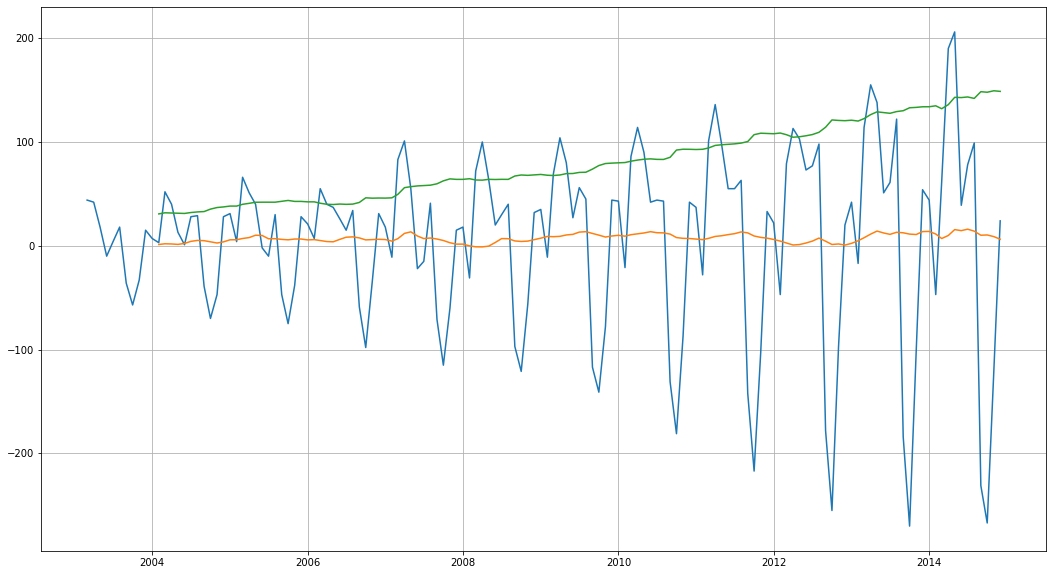

In [93]:
test_stationary(two_dif)

In [94]:
import numpy as np
np.log(ts_sales)   # log of the data

2003-01-01    4.948760
2003-02-01    5.056246
2003-03-01    5.220356
2003-04-01    5.293305
2003-05-01    5.313206
                ...   
2014-08-01    6.742881
2014-09-01    6.461468
2014-10-01    6.364751
2014-11-01    6.251904
2014-12-01    6.405228
Freq: MS, Name: Tractor-Sales, Length: 144, dtype: float64

In [95]:
log_dif_data = np.log(ts_sales).diff(periods=1).dropna()   
log_dif_data

2003-02-01    0.107486
2003-03-01    0.164110
2003-04-01    0.072949
2003-05-01    0.019901
2003-06-01   -0.071459
                ...   
2014-08-01   -0.026761
2014-09-01   -0.281412
2014-10-01   -0.096717
2014-11-01   -0.112847
2014-12-01    0.153325
Freq: MS, Name: Tractor-Sales, Length: 143, dtype: float64

-------------
results of Diskey-fuller test:
Test Statistics               -2.680467
pvalue                         0.077480
# lags used                   14.000000
# of observations            128.000000
confidense Intevals (1%)      -3.482501
confidense Intevals (5%)      -2.884398
confidense Intevals (10%)     -2.578960
dtype: float64


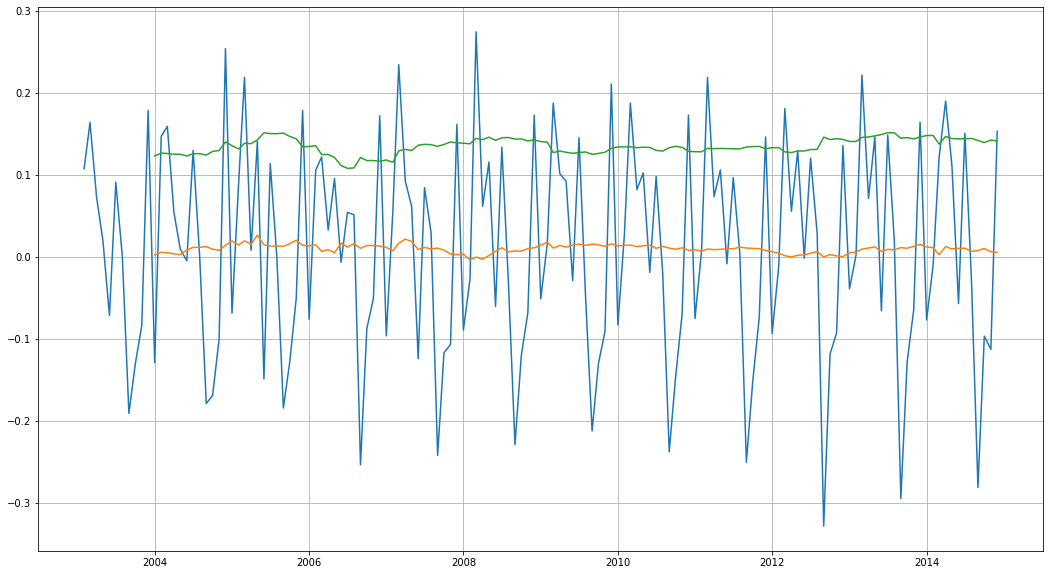

In [96]:
test_stationary(log_dif_data)

-------------
results of Diskey-fuller test:
Test Statistics               -3.200722
pvalue                         0.019943
# lags used                   11.000000
# of observations            130.000000
confidense Intevals (1%)      -3.481682
confidense Intevals (5%)      -2.884042
confidense Intevals (10%)     -2.578770
dtype: float64


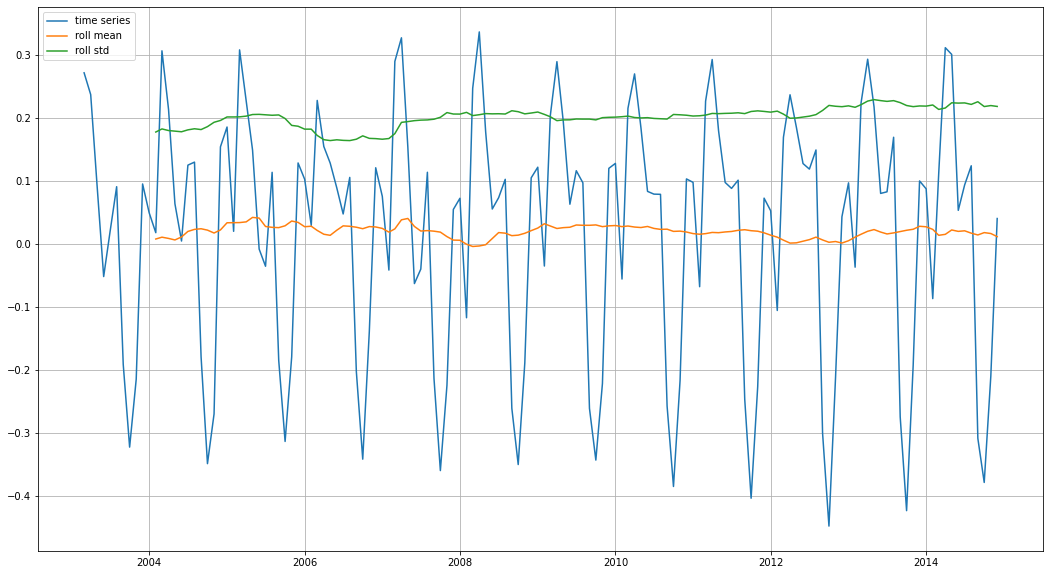

In [102]:
log_dif_data2 = np.log(ts_sales).diff(periods=2).dropna()   
log_dif_data2
test_stationary(log_dif_data2)

# Arima Sarima

https://www.youtube.com/watch?v=52z_3wYz7XU

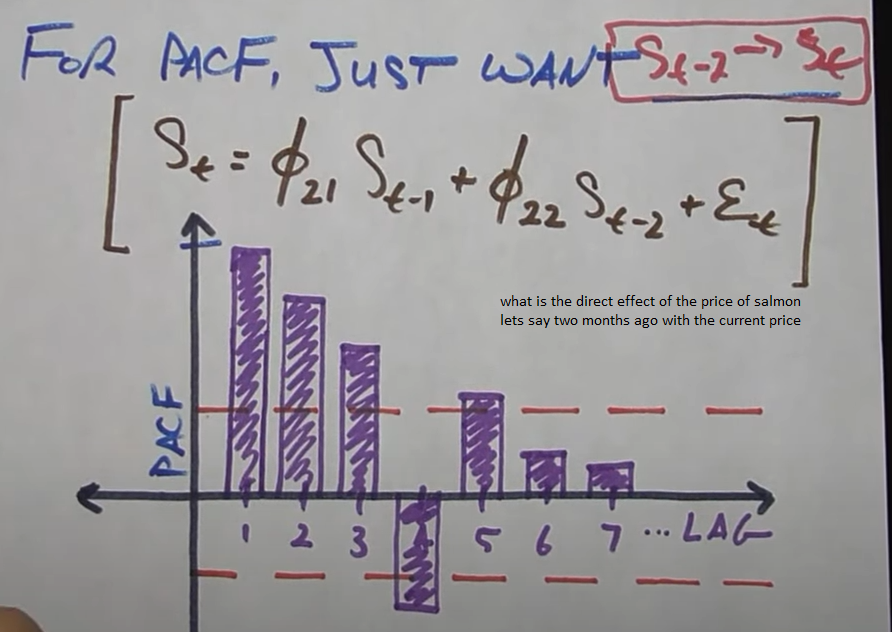

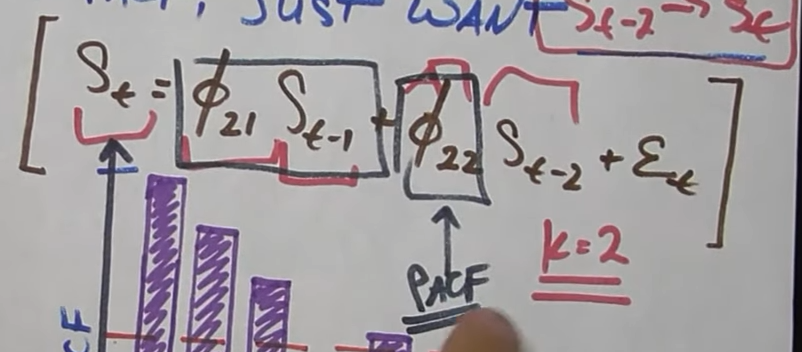

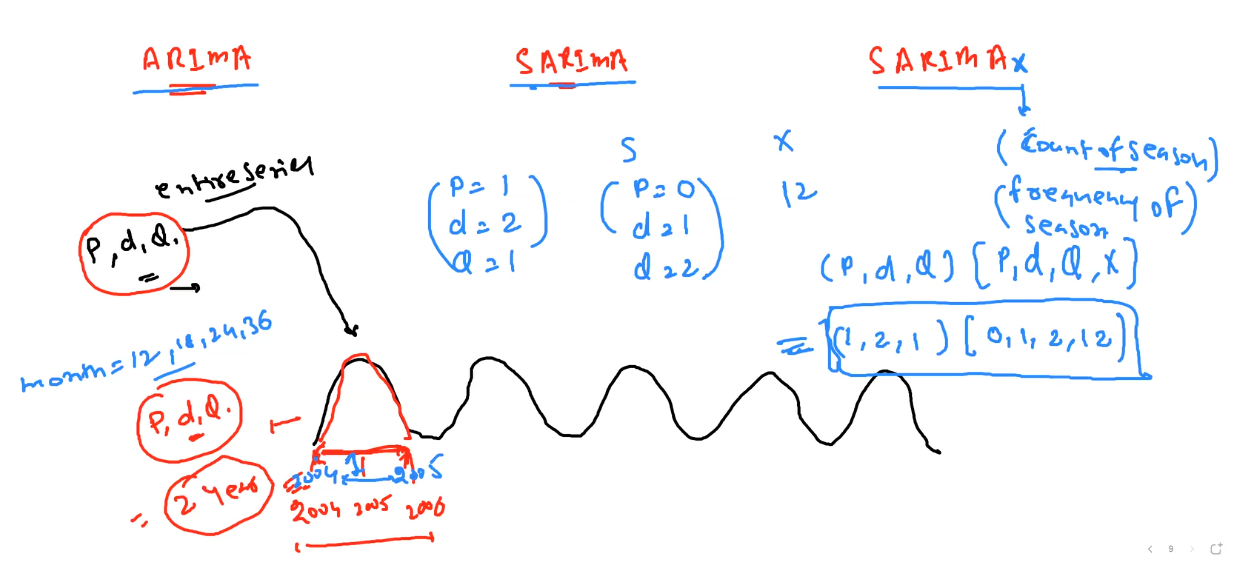

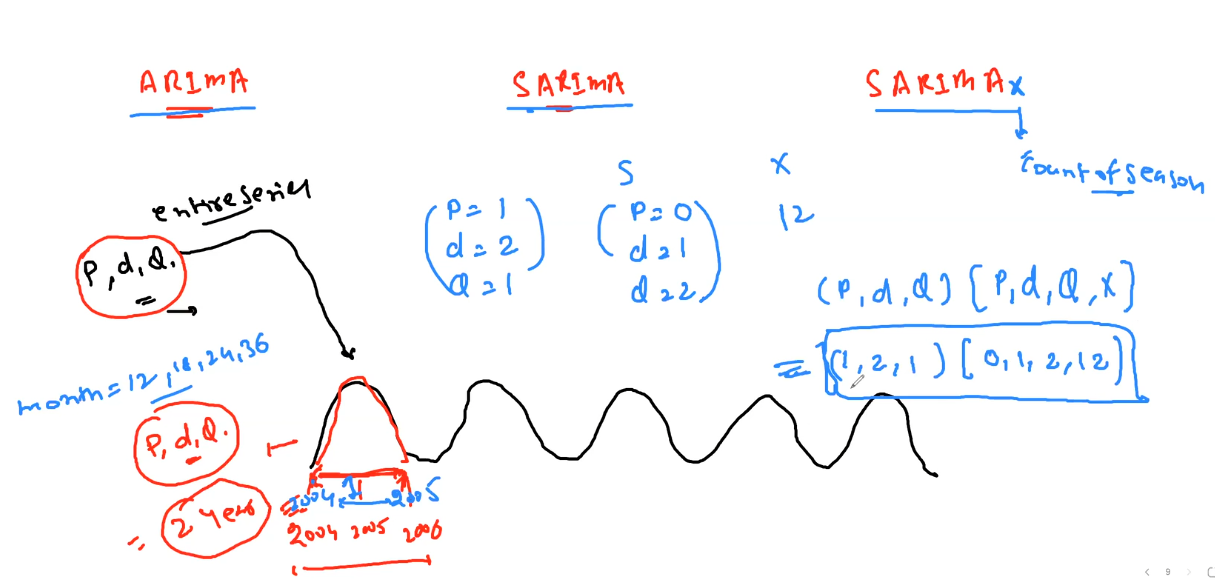

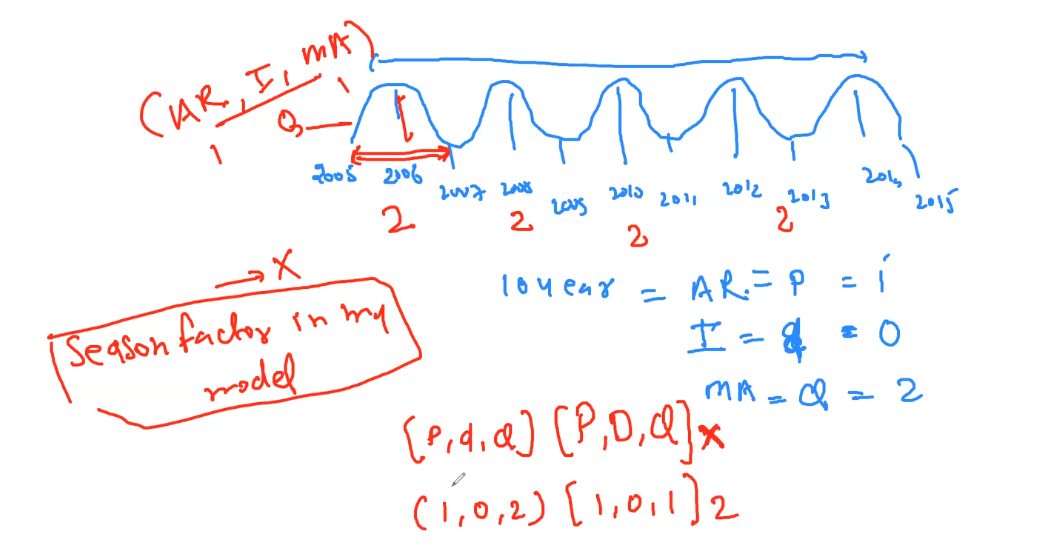

In [104]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf


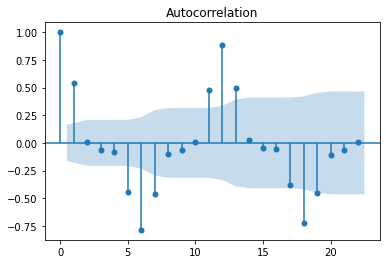

In [106]:
smt.graphics.plot_acf(log_dif_data2);  # the imput dataset should be stationary

C:\Users\rivil\AppData\Roaming\Python\Python36\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


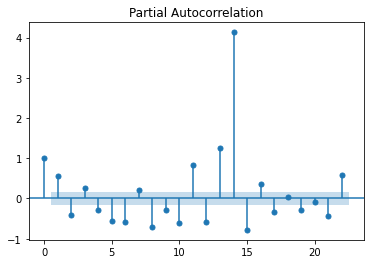

In [107]:
smt.graphics.plot_pacf(log_dif_data2); 

In [139]:
import os
from  statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

In [140]:
def arima_model(X,y,arima_order):
    history = [i for i in X]   # reformat to list the dataset values
    prediction = list()
    for i in range(len(y)):
        model = ARIMA(history, order=arima_order)  # p - AR, d - diff, q - MA
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        prediction.append(yhat)
        history.append(y[i])
    mse = np.sqrt(mean_squared_error(y, prediction))  # mse calculation
    return mse
                      


In [141]:
def evaluate_arima_model( dataset, test,  p_value, d_value, q_value):
    dataset = dataset.astype("float32")         # reformat to float32
    best_score, best_cfg = float("inf"), None   # initialize values
    for i in p_value:
        for j in d_value:
            for k in q_value:
                order = (i,j,k)
                
                try:
                    rmse = arima_model(dataset, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print(f" ARIMA:{order}  RMSE:{rmse}")
                except:
                    continue
    print(f"Best rms: {best_score} and best cfg: {best_cfg}")      
    

In [124]:
len(log_dif_data2)

142

* len(log_dif_data) is 142 months, thus  around 12 years
* last 2 years as test data
* first 10 years as train data

In [125]:
train_data = log_dif_data2[:120]
test_data = log_dif_data2[120:]
print(len(train_data), len(test_data))

120 22


In [128]:
train_data

2003-03-01    0.271596
2003-04-01    0.237059
2003-05-01    0.092850
2003-06-01   -0.051558
2003-07-01    0.019513
                ...   
2012-10-01   -0.447348
2012-11-01   -0.211425
2012-12-01    0.043297
2013-01-01    0.097074
2013-02-01   -0.036682
Freq: MS, Name: Tractor-Sales, Length: 120, dtype: float64

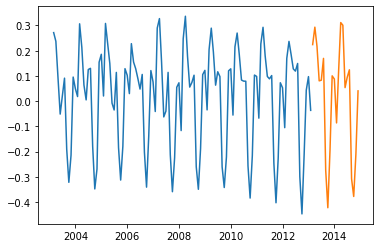

In [130]:
plt.plot(train_data)
plt.plot(test_data)

In [129]:
data = [i for i in  train_data]   # list of values
print(type(data))
data

<class 'list'>


[0.27159593470015597,
 0.23705901937618457,
 0.09285015396346274,
 -0.051557809664849685,
 0.019512814223581643,
 0.09097177820572622,
 -0.19105523676270852,
 -0.3220834991691133,
 -0.2144098713454552,
 0.09531017980432477,
 0.049480057263369126,
 0.018018505502678472,
 0.3064699863174143,
 0.21357410029805912,
 0.06390380197947998,
 0.004796172263493048,
 0.12516314295400655,
 0.12993642170666408,
 -0.17896584894698275,
 -0.34830669426821625,
 -0.2694243038782158,
 0.15415067982725805,
 0.1856056319951449,
 0.020202707317519497,
 0.307966743623286,
 0.22713557258374717,
 0.14897379164772495,
 -0.008000042667076102,
 -0.03521490629106694,
 0.11375888535665801,
 -0.1844744101550555,
 -0.3130917879771493,
 -0.17887921260298167,
 0.12861737782209381,
 0.10277986906433423,
 0.02972618026520113,
 0.22778393087071258,
 0.15474822988985437,
 0.1284257885888218,
 0.08909999478604647,
 0.04770379795721169,
 0.10568833077303807,
 -0.2023975133666438,
 -0.34120317388979515,
 -0.13843202862352477,

In [142]:
p_value = range(0,2)
d_value = range(0,2)
q_value = range(0,2)
evaluate_arima_model(train_data, test_data, p_value,d_value,q_value)

 ARIMA:(0, 0, 0)  RMSE:0.21869259607268499
 ARIMA:(0, 0, 1)  RMSE:0.14448708056110454
 ARIMA:(0, 1, 0)  RMSE:0.20516619439754202
 ARIMA:(0, 1, 1)  RMSE:0.19837958166684308
 ARIMA:(1, 0, 0)  RMSE:0.18175926713309729
 ARIMA:(1, 0, 1)  RMSE:0.14291715690735393
 ARIMA:(1, 1, 0)  RMSE:0.2045676862103698
 ARIMA:(1, 1, 1)  RMSE:0.17965602932862618
Best rms: 0.14291715690735393 and best cfg: (1, 0, 1)


In [162]:
history = [i for i in train_data]
len(history)


120

In [163]:
history[:5], history[-5:]

([0.27159593470015597,
  0.23705901937618457,
  0.09285015396346274,
  -0.051557809664849685,
  0.019512814223581643],
 [-0.4473484860643415,
  -0.21142466720099584,
  0.0432968057533234,
  0.09707384869182167,
  -0.036681566634604756])

In [164]:
history = [i for i in train_data]   # reformat to list the dataset values
prediction = list()
arima_order=(1,0,1)
for i in range(len(test_data)):
    model = ARIMA(history, order=arima_order)  # p - AR, d - diff, q - MA
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    prediction.append(yhat)
    history.append(test_data[i])
mse = np.sqrt(mean_squared_error(test_data, prediction))  # mse calculation

In [165]:
len(history), len(prediction)

(142, 22)

In [166]:
history[:5], history[-5:]

([0.27159593470015597,
  0.23705901937618457,
  0.09285015396346274,
  -0.051557809664849685,
  0.019512814223581643],
 [0.12414165227468388,
  -0.3081738004987855,
  -0.3781298789399923,
  -0.209564293187829,
  0.040477701178931014])

In [152]:
y_pred = [i for i in prediction]
y_pred

[array([0.00017501]),
 array([0.26768572]),
 array([0.08120123]),
 array([0.1842469]),
 array([-0.07023129]),
 array([0.18367121]),
 array([0.02898039]),
 array([-0.30968608]),
 array([-0.14273741]),
 array([-0.0565425]),
 array([0.1855693]),
 array([-0.0677033]),
 array([-0.01162519]),
 array([0.15375033]),
 array([0.2149216]),
 array([0.14562966]),
 array([-0.06256452]),
 array([0.18880152]),
 array([-0.02567375]),
 array([-0.29815061]),
 array([-0.10938208]),
 array([-0.11133211])]

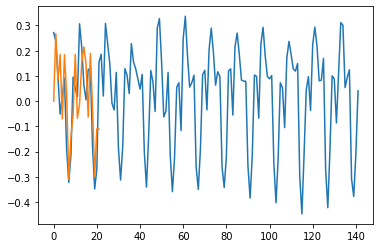

In [153]:
plt.plot(history)
plt.plot(y_pred)